In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

Using TensorFlow backend.


In [2]:
item = 'Abyssal_whip'

In [3]:
items.getPrices(item)[-10:]

[2663958,
 2643140,
 2626840,
 2614224,
 2606262,
 2593007,
 2593049,
 2587581,
 2581066,
 2581709]

In [4]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Abyssal_whip.png',
 'lowAlch': '48000',
 'examine': 'A weapon from the abyss.',
 'highAlch': '72000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '0.453',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Abyssal_whip',
 'alchable': 'True',
 'exchangePrice': '2622266',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

1286 1295 1286


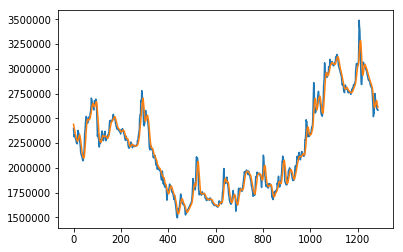

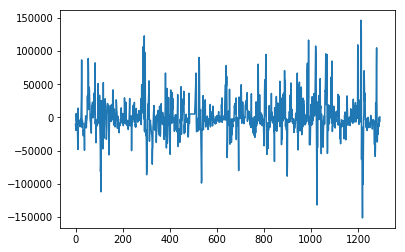

In [5]:
ma = 10
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
print(len(movAvg),len(prices),len(prices[ma-1:]))
plt.plot(prices[ma-1:])
plt.plot(movAvg)
plt.plot()
plt.show()
plt.plot(changes)
plt.show()

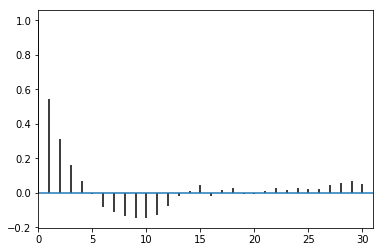

In [39]:
plt.acorr(changes,maxlags=30)
plt.xlim(0,31)
plt.show()

In [6]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

[[-0.39886178]
 [-0.59478149]
 [-0.73148709]
 [ 0.21354183]
 [-0.21807331]]


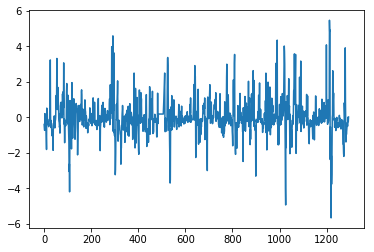

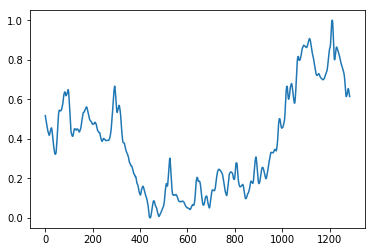

In [7]:
scaler = StandardScaler()
s_changes = scaler.fit_transform(np.array(changes).reshape(-1, 1))
print(s_changes[0:5])
s_movAvg = minMax(movAvg)
plt.plot(s_changes)
plt.show()
plt.plot(s_movAvg)
plt.show()

In [8]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0
        

In [23]:
x = []
y = []
p = []
size = 10
for i in range(-1*len(s_changes),-1*size,1):
    x.append([a[0] for a in s_changes[i:i+size]])
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size+1])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[-0.5947814913458914, -0.7314870851831584, 0.2135418308995593, -0.2180733097526775, -0.23773644311283235, -0.2906209084548107, -0.4258283587979706, -0.5626463133972955, -1.3085345055258355, -1.8100380401781655] 0
10 10
1284 1284 1284


In [24]:
s1 = int(len(y)*.8)
s2  =int(len(y)*.9)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])

1027 1027 128 128 129 129 129
10 [-0.39886178 -0.59478149 -0.73148709  0.21354183 -0.21807331 -0.23773644
 -0.29062091 -0.42582836 -0.56264631 -1.30853451]
0
10 [ 0.40991099  0.06260387 -0.44036035 -0.43998581 -0.19608805 -0.34706346
 -0.09103074 -0.03945715 -0.19593824  0.0195697 ]
0


In [25]:
model = Sequential()
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=10)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Train on 1027 samples, validate on 128 samples
Epoch 1/50
1027/1027 [==============================] - 1s 517us/step - loss: 0.6895 - acc: 0.5745 - val_loss: 0.6635 - val_acc: 0.5781
Epoch 2/50
1027/1027 [==============================] - 0s 295us/step - loss: 0.6700 - acc: 0.5930 - val_loss: 0.6437 - val_acc: 0.6406
Epoch 3/50
1027/1027 [==============================] - 0s 291us/step - loss: 0.6565 - acc: 0.6193 - val_loss: 0.6278 - val_acc: 0.7109
Epoch 4/50
1027/1027 [==============================] - 0s 287us/step - loss: 0.6464 - acc: 0.6514 - val_loss: 0.6147 - val_acc: 0.6875
Epoch 5/50
1027/1027 [==============================] - 0s 283us/step - loss: 0.6380 - acc: 0.6553 - val_loss: 0.6026 - val_acc: 0.7031
Epoch 6/50
1027/1027 [==============================] - 0s 278us/step - loss: 0.6317 - acc: 0.6660 - val_loss: 0.5931 - val_acc: 0.7109
Epoch 7/50
1027/1027 [==============================] - 0s 289us/step - loss: 0.6268 - acc: 0.6796 - val_loss: 0.5870 - val_acc: 0.7188
E

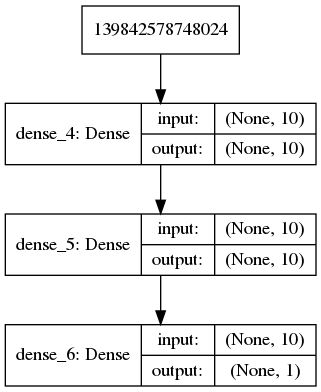

In [27]:
import IPython
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image("test_keras_plot_model.png")

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


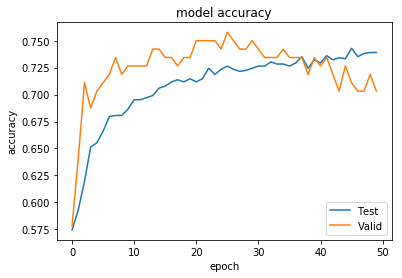

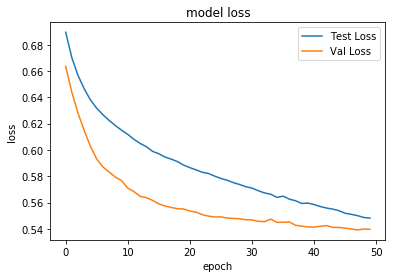

In [28]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

[[0.46613082]
 [0.34194532]
 [0.22320952]
 [0.28392756]
 [0.25313976]]


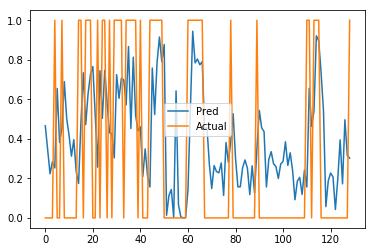

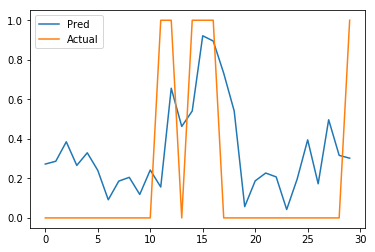

In [29]:
y_pred = model.predict(x_test)
print(y_pred[:5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot(y_pred[-30:],label='Pred')
plt.plot(y_test[-30:],label='Actual')
plt.legend()
plt.show()

In [22]:
bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
ppBest = [([-100],-1)] * len(budgets)
bhBest = [([-100],-1)] * len(budgets)
perBest = [([-100],-1)] * len(budgets)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    for i in range(10):
        mp = ts.modelProfit(x_test,t,model,p_test,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        pp = ts.perfectProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if pp[-1]>ppBest[b][0][-1]:
            ppBest[b] = (pp,t)
        per = ts.persistanceProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if per[-1]>perBest[b][0][-1]:
            perBest[b] = (per,t)
        t += .02

129
100000


NameError: name 'ts' is not defined

In [ ]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tPerfect\n\t',ppBest[b][0][-1],ppBest[b][1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

In [ ]:
for b in range(len(budgets)):
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(ppBest[b][0],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()